In [98]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
#import tensorflow as tf
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [99]:
# Import the input dataset
tracks_path = 'Resources/pre_spotify_target_artists.csv'
tracks_df = pd.read_csv(tracks_path)
tracks_df.head()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,genres_classic bollywood,genres_classical era,genres_classical,genres_desi pop,genres_filmi,genres_hoerspiel,genres_sufi,genres_tango,genres_vintage tango,genres_other
0,0.34,0.05,0.00,0.55,0.80,0.00,0.00,0.00,0.63,0.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,0.43,0.03,0.00,0.18,0.80,0.00,0.00,0.00,0.63,0.77,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2,0.16,0.04,0.00,0.64,0.80,0.00,0.00,0.00,0.58,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.32,0.03,0.00,0.18,0.80,0.01,1.00,0.00,0.26,0.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,0.35,0.04,0.00,0.36,0.60,0.00,0.00,0.00,0.62,0.52,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [100]:
# Check the columns of dataframe
tracks_df.columns

Index(['track_popularity', 'duration_ms', 'explicit', 'key', 'time_signature',
       'followers', 'artist_popularity', 'unique_playlists', 'danceability',
       'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'artist_frequency',
       'Year', 'genres_classic bollywood', 'genres_classical era',
       'genres_classical', 'genres_desi pop', 'genres_filmi',
       'genres_hoerspiel', 'genres_sufi', 'genres_tango',
       'genres_vintage tango', 'genres_other'],
      dtype='object')

In [101]:
# Remove artist_popularity target from features data
y = tracks_df.artist_popularity
X = tracks_df.drop(columns=["artist_popularity"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

## Model 1: Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

# train model
model1 = LogisticRegression(solver="lbfgs",max_iter=1000)

# fit model
model1 = model1.fit(X_train, y_train)

# predict probability
pred_prob1 = model1.predict_proba(X_test)
prediction1 = model1.predict(X_test)

In [103]:
print(pred_prob1)

[[0.92587481 0.07412519]
 [0.8974364  0.1025636 ]
 [0.01116986 0.98883014]
 ...
 [0.62892688 0.37107312]
 [0.71550559 0.28449441]
 [0.94272817 0.05727183]]


In [104]:
print(prediction1)

[0. 0. 1. ... 0. 0. 0.]


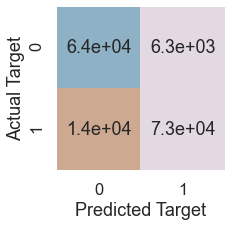

In [105]:
# Define a function to create a nicer looking confusion matrix
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_pred):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, cmap="twilight_r")
    plt.xlabel("Predicted Target")
    plt.ylabel("Actual Target")
plot_confusion_matrix(y_test, prediction1)

In [106]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, prediction1)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, prediction1))

Accuracy Score : 0.8705655962510949
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     69924
         1.0       0.92      0.84      0.88     86495

    accuracy                           0.87    156419
   macro avg       0.87      0.87      0.87    156419
weighted avg       0.88      0.87      0.87    156419



In [107]:
from joblib import dump, load
dump(model1, 'model21.joblib')

['model21.joblib']

In [108]:
model1 = load('model21.joblib')

## Model 2: Easy Ensemble AdaBoost Classifier

In [109]:
# from imblearn.ensemble import EasyEnsembleClassifier

# # Create a an easy ensemble classifier.
# model2 = EasyEnsembleClassifier(n_estimators=100, random_state=1)

# # Fit the model
# model2 =model2.fit(X_train, y_train)

# # predict probability
# pred_prob2 = model2.predict_proba(X_test)
# prediction2 = model2.predict(X_test)

In [110]:
# # Create the confusion matrix 
# plot_confusion_matrix(y_test, prediction2)

In [111]:
# # Calculate the balanced accuracy score
# bac_score = balanced_accuracy_score(y_test, prediction2)

# # Print the imbalanced classification report
# print("Classification Report")
# print(classification_report_imbalanced(y_test, prediction2))

In [112]:
# from joblib import dump, load
# dump(model2, 'model22.joblib')

In [113]:
model2 = load('model22.joblib')

## Model 3: Decision Trees

In [16]:
# from sklearn import tree

# # Creating the decision tree classifier instance.
# model3 = tree.DecisionTreeClassifier()

# # Fit the model.
# model3 = model3.fit(X_train, y_train)

# # predict probability
# pred_prob3 = model3.predict_proba(X_test)
# prediction3 = model3.predict(X_test)

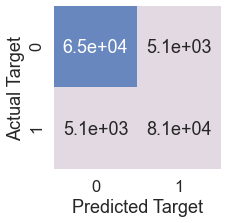

In [17]:
# # Create the confusion matrix 
# plot_confusion_matrix(y_test, prediction3)

In [18]:
# # Calculating the accuracy score.
# acc_score = accuracy_score(y_test, prediction3)

# # Displaying results
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, prediction3))

Accuracy Score : 0.9345348071525837
Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     69924
         1.0       0.94      0.94      0.94     86495

    accuracy                           0.93    156419
   macro avg       0.93      0.93      0.93    156419
weighted avg       0.93      0.93      0.93    156419



In [19]:
# from joblib import dump, load
# dump(model3, 'model32.joblib')

['model32.joblib']

In [114]:
model3 = load('model32.joblib')

## Model 4: Random Forest

In [21]:
# from sklearn.ensemble import RandomForestClassifier

# # Create a random forest classifier.
# model4 = RandomForestClassifier(n_estimators=128, random_state=78)

# # Fit the model
# model4 =model4.fit(X_train, y_train)

# # predict probability
# pred_prob4 = model4.predict_proba(X_test)
# prediction4 = model4.predict(X_test)

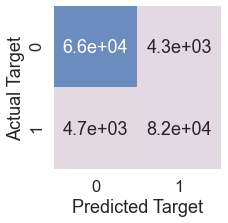

In [22]:
# # Create the confusion matrix 
# plot_confusion_matrix(y_test, prediction4)

In [23]:
# # Calculating the accuracy score.
# acc_score = accuracy_score(y_test, prediction4)

# # Displaying results
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, prediction4))

Accuracy Score : 0.9423599434851265
Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     69924
         1.0       0.95      0.95      0.95     86495

    accuracy                           0.94    156419
   macro avg       0.94      0.94      0.94    156419
weighted avg       0.94      0.94      0.94    156419



In [24]:
# from joblib import dump, load
# dump(model4, 'model42.joblib')

['model42.joblib']

In [115]:
model4 = load('model42.joblib')

In [116]:
# Calculate feature importance in the Random Forest model.
importances = model4.feature_importances_
importances

array([9.37353972e-02, 2.45042227e-02, 3.17439134e-03, 9.15368305e-03,
       2.13698486e-03, 5.05435333e-01, 1.64162712e-02, 1.77625227e-02,
       2.08459749e-02, 2.04500088e-02, 2.47336060e-03, 2.22862549e-02,
       2.40919673e-02, 1.57023951e-02, 1.64019736e-02, 1.79534269e-02,
       1.62039856e-02, 1.23886451e-01, 4.47707919e-02, 4.52582725e-05,
       1.18684837e-05, 4.60734206e-06, 2.57562679e-05, 1.21283658e-04,
       1.40363875e-03, 2.71615070e-06, 1.49558762e-07, 8.62538868e-07,
       9.98462980e-04])

In [117]:
# Sort the features by their importance.
sorted(zip(model4.feature_importances_, X.columns), reverse=True)

[(0.5054353328372669, 'followers'),
 (0.12388645057696494, 'artist_frequency'),
 (0.09373539719535165, 'track_popularity'),
 (0.044770791892109855, 'Year'),
 (0.024504222745178047, 'duration_ms'),
 (0.02409196727861257, 'acousticness'),
 (0.02228625492642802, 'speechiness'),
 (0.020845974882265857, 'energy'),
 (0.020450008793244545, 'loudness'),
 (0.01795342685828946, 'valence'),
 (0.017762522700830993, 'danceability'),
 (0.01641627119995195, 'unique_playlists'),
 (0.016401973592941214, 'liveness'),
 (0.016203985602142684, 'tempo'),
 (0.015702395065815285, 'instrumentalness'),
 (0.009153683045731954, 'key'),
 (0.0031743913419569475, 'explicit'),
 (0.002473360597693925, 'mode'),
 (0.002136984863632533, 'time_signature'),
 (0.0014036387512670035, 'genres_hoerspiel'),
 (0.000998462980034621, 'genres_other'),
 (0.00012128365783799146, 'genres_filmi'),
 (4.5258272455096786e-05, 'genres_classic bollywood'),
 (2.5756267906982184e-05, 'genres_desi pop'),
 (1.1868483697020627e-05, 'genres_class

In [118]:
# Format the values in 2 decimals 
pd.set_option('display.float_format', "{:.2f}".format)

In [119]:
feature_importance_df = pd.DataFrame(sorted(zip(model4.feature_importances_, X.columns), reverse=True), columns=["features_importance", "feature"])
feature_importance_df.head(30)

,features_importance,feature
0,0.51,followers
1,0.12,artist_frequency
2,0.09,track_popularity
3,0.04,Year
4,0.02,duration_ms
5,0.02,acousticness
6,0.02,speechiness
7,0.02,energy
8,0.02,loudness
9,0.02,valence


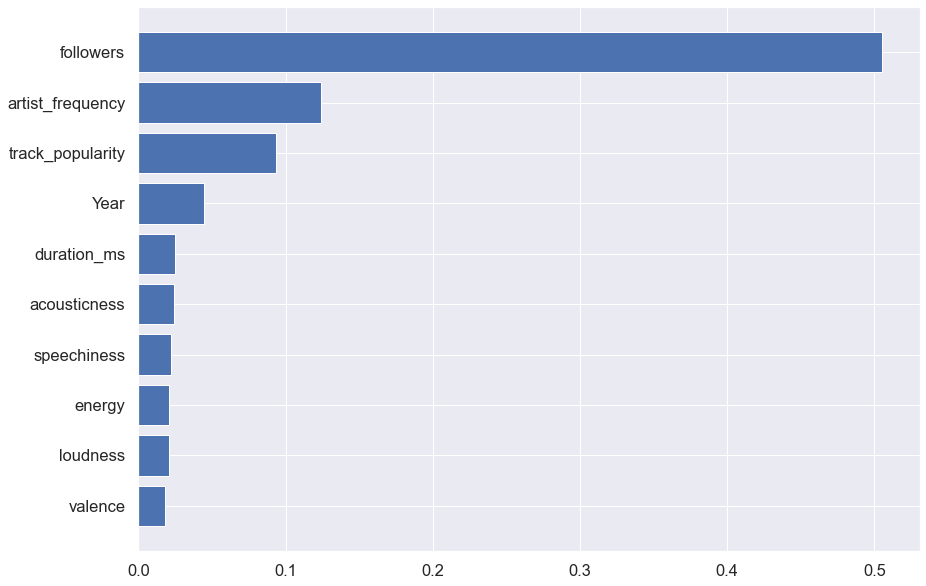

In [120]:
# Plot the dataframe for the first ten observations
fig,ax = plt.subplots(figsize=(14,10)) 
ax.barh(feature_importance_df['feature'][:10],
       feature_importance_df['features_importance'][:10])
ax.invert_yaxis()

## Backward Feature Selection

In [131]:
from sklearn.feature_selection import SequentialFeatureSelector
from time import time

In [122]:
# Remove target from features data
y = tracks_df.artist_popularity
X = tracks_df.drop(columns=["artist_popularity"])

In [40]:
# Train the model
# model_Log = LogisticRegression(solver="lbfgs",max_iter=1000)

In [43]:
# Use backward feature selection to reduce the number of features
# sfs = SequentialFeatureSelector(model_Log, n_features_to_select=None, direction='backward')

In [44]:
# Fit the sequential feature selector model (This line of code took three days to execute)
# sfs.fit(X, y) 

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(max_iter=1000))

In [63]:
# from joblib import dump, load

# # Save the model
# dump(sfs, 'model_sfs.joblib')

['model_sfs.joblib']

In [123]:
# Load the model
sfs = load('model_sfs.joblib')

In [124]:
# Get the number of features using backward feature selection
# Features: 'track_popularity', 'explicit', 'time_signature', 'followers',
# 'unique_playlists', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness'
# 'liveness', 'artist_frequency', 'year', 'genres_hoerspiel'
sfs.get_support()

array([ True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True, False, False, False, False, False,  True, False, False,
       False, False])

In [125]:
# Transform X and print the X_new shape
X_new = sfs.transform(X)
print(X_new.shape)

(625676, 14)


In [126]:
# Print the y shape
print(y.shape)

(625676,)


In [127]:
# Split training/test datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y, random_state=42)

In [70]:
# Random Forest Classifier using feature selection

In [71]:
# from sklearn.ensemble import RandomForestClassifier

# # Create a random forest classifier. Random Forest with feature selection (RFWFS)
# RFWFS = RandomForestClassifier(n_estimators=128, random_state=78)

# # Fit the model
# RFWFS = RFWFS.fit(X_train1,y_train1)

# # Predict probability
# pred_prob_RFWFS = RFWFS.predict_proba(X_test1)
# prediction_RFWFS = RFWFS.predict(X_test1)

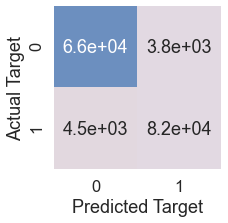

In [72]:
# # Create the confusion matrix 
# plot_confusion_matrix(y_test1, prediction_RFWFS)

In [73]:
# # Calculating the accuracy score.
# acc_score = accuracy_score(y_test1, prediction_RFWFS)

# # Displaying results
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test1, prediction_RFWFS))

Accuracy Score : 0.9473593361420288
Classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     69924
         1.0       0.96      0.95      0.95     86495

    accuracy                           0.95    156419
   macro avg       0.95      0.95      0.95    156419
weighted avg       0.95      0.95      0.95    156419



In [74]:
# # Save the model
# dump(RFWFS, 'model_RFWFS.joblib')

['model_RFWFS.joblib']

In [128]:
# Load the model
RFWFS = load('model_RFWFS.joblib')

# Predict probability
pred_prob_RFWFS = RFWFS.predict_proba(X_test1)
prediction_RFWFS = RFWFS.predict(X_test1)

Using the backward feature selection, we reduced the number of features to 14 and then applied the Random Forest classifier to the new data set. Comparing the results, it can be seen that the accuracy score of the model has increased to 0.947.   

## Models Evaluation 

From the numerous ways to evaluate the performance of a classifier, we use the difference between two popular performance reporting methods: Precision-Recall (PR) Curve and Receiver Operating Characteristic (ROC) Curve.

### Precision-Recall (PR) Curve: 
A PR curve is simply a graph with Precision values on the y-axis and Recall values on the x-axis. In other words, the PR curve contains TP/(TP+FN) on the y-axis and TP/(TP+FP) on the x-axis. It is desired that the algorithm should have both high precision, and high recall. However, most machine learning algorithms often involve a trade-off between the two. A good PR curve has greater AUC (area under curve).

## Precision-Recall curve  

In [129]:
from sklearn.metrics import average_precision_score

# Compute average precision from prediction scores for each model
average_precision1 = average_precision_score(y_test, prediction1)
average_precision2 = average_precision_score(y_test, prediction2)
average_precision3 = average_precision_score(y_test, prediction3)
average_precision4 = average_precision_score(y_test, prediction4)
average_precision5 = average_precision_score(y_test1, prediction_RFWFS)

# Print the average precision for each model
print('Average precision score Logistic Regression: {0:0.2f}'.format(average_precision1))
print('Average precision score Easy Ensemble AdaBoost: {0:0.2f}'.format(average_precision2))
print('Average precision score Decision Trees: {0:0.2f}'.format(average_precision3))
print('Average precision score Random Forest: {0:0.2f}'.format(average_precision4))
print('Average precision score Random Forest Using Feature Selection : {0:0.2f}'.format(average_precision5))

Average precision score Logistic Regression: 0.86
Average precision score Easy Ensemble AdaBoost: 0.89
Average precision score Decision Trees: 0.92
Average precision score Random Forest: 0.93
Average precision score Random Forest Using Feature Selection : 0.94


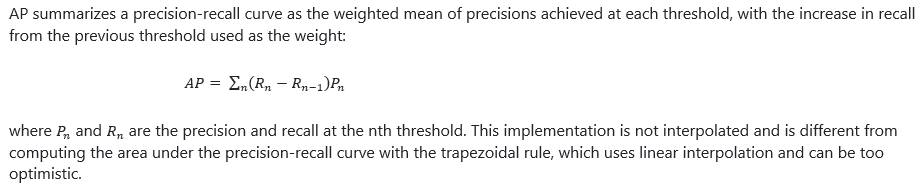

Text(0.5, 1.0, 'Precision-Recall curve')

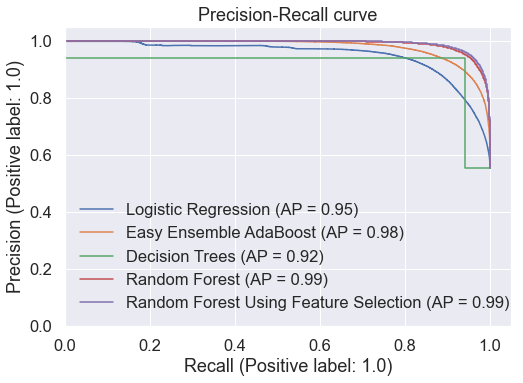

In [130]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

# Plot precision-recall pairs for different probability thresholds of each model
plot_precision_recall_curve(model1, X_test, y_test, ax = plt.gca(),name = "Logistic Regression")
plot_precision_recall_curve(model2, X_test, y_test, ax = plt.gca(),name = "Easy Ensemble AdaBoost")
plot_precision_recall_curve(model3, X_test, y_test, ax = plt.gca(),name = "Decision Trees")
plot_precision_recall_curve(model4, X_test, y_test, ax = plt.gca(),name = "Random Forest")
plot_precision_recall_curve(RFWFS, X_test1, y_test1, ax = plt.gca(),name = "Random Forest Using Feature Selection")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall curve')

In fact, a model with perfect skill is depicted as a point at a coordinate of (1,1). A skillful model is represented by a curve that bows towards a coordinate of (1,1). A no-skill classifier will be a horizontal line on the plot with a precision that is proportional to the number of positive examples in the dataset. Therefore, the last two classifiers selected from the Random Forest family, the first by keeping the features and the second by dropping some of the least importance are closer to the ideal model. 

### Receiver Operating Characteristic (ROC) Curve:
Receiver operating characteristic(ROC) curve is created by plotting the true positive rate (TPR) on y-axis against the false positive rate (FPR) on x-axis at various threshold settings. 
Area under the ROC Curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).
AUC-score is always between 0 and 1.
AUC-score gives accuracy of the proposed model.
The top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [132]:
from sklearn.metrics import roc_curve

# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2,tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test1, pred_prob_RFWFS[:,1], pos_label=1)

In [133]:
# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [134]:
from sklearn.metrics import roc_auc_score

# AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test1, pred_prob_RFWFS[:,1])

# Print the AUC score for each model
print('AUC score Logistic Regression: {0:0.2f}'.format(auc_score1))
print('AUC score Easy Ensemble AdaBoost: {0:0.2f}'.format(auc_score2))
print('AUC score Decision Trees: {0:0.2f}'.format(auc_score3))
print('AUC score Random Forest: {0:0.2f}'.format(auc_score4))
print('AUC score Random Forest Using Feature Selection: {0:0.2f}'.format(auc_score5))


AUC score Logistic Regression: 0.94
AUC score Easy Ensemble AdaBoost: 0.97
AUC score Decision Trees: 0.93
AUC score Random Forest: 0.99
AUC score Random Forest Using Feature Selection: 0.99


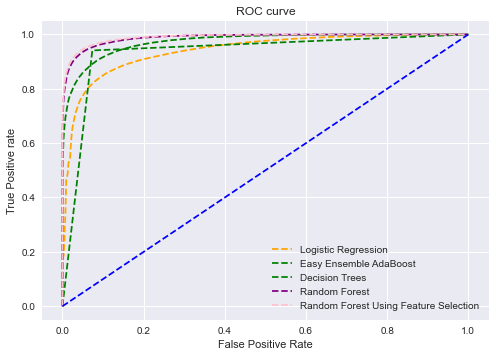

In [135]:
# Plot the roc curves for the all the models using matplotlib
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Easy Ensemble AdaBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Decision Trees')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Random Forest Using Feature Selection')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Results
It is evident from the plot that the AUC for the Random Forest and Random Forest Using Feature Selection ROC curves are higher than that for other ROC curves. Therefore, we can say that Random Forest did a better job of classifying the positive class in the dataset. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. It is important to note that the classifier that has a higher AUC on the ROC curve will always have a higher AUC on the PR curve as well.

## K-Fold Cross Validation

In [136]:
# Import required library
from sklearn.model_selection import KFold 
import statistics as st

In [137]:
# k = 10
# kf = KFold(n_splits=k, random_state=None)

# # Train the model
# model = LogisticRegression(solver= 'liblinear')

# acc_score = []
# pred_prob_list = []
# prediction_list = []
# fpr_list = []
# tpr_list = []
# thresh_list = []
# auc_scores = []
 
# for train_index , test_index in kf.split(X):    
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
     
#     # Fit the model
#     model = model.fit(X_train,y_train)
         
#     # Predict probability
#     pred_prob = model.predict_proba(X_test)
#     prediction = model.predict(X_test)
    
        
#     # Calculating the accuracy score.
#     acc = accuracy_score(y_test, prediction)
#     acc_score.append(acc)
    
        
#     # Displaying results
#     print("Classification Report:")
#     print(classification_report(y_test, prediction))
    
#     # Add the probability and prediction to the list
#     pred_prob_list.append(pred_prob)
#     prediction_list.append(prediction)
    
#     # ROC curve for models
#     fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    
#     # Add fpr, tpr and thresh in the lists
#     fpr_list.append(fpr)
#     tpr_list.append(tpr)
#     thresh_list.append(thresh)
    
#     # AUC scores
#     auc_score = roc_auc_score(y_test, pred_prob[:,1])
#     auc_scores.append(auc_score)
#     print(f"auc_score: {auc_score}")
    
# # Calculate the median and average accuracy score
# avg_acc_score = sum(acc_score)/k
# print(f"Median Accuracy Score : {st.median(acc_score)}")
# print(f"Median auc_score): {st.median(auc_scores)}")
# print(f"Average Accuracy Score : {avg_acc_score}")   

In [138]:
# from joblib import dump, load
# dump(model, 'model-2.joblib')

In [139]:
model = load('model-2.joblib')

In [140]:
print(len(pred_prob_list))

10


In [141]:
# ROC curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

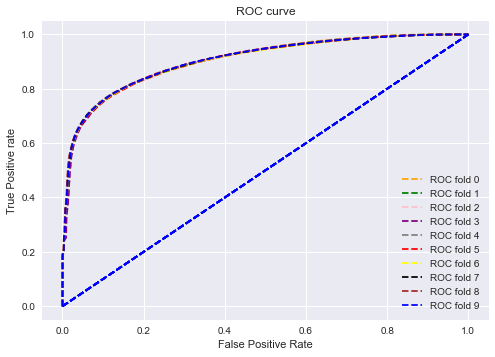

In [142]:
# Plot the roc curves for the all the models using matplotlib
plt.style.use('seaborn')

color = ['orange', 'green', 'pink', 'purple', 'gray', 'red', 'yellow', 'black', 'brown', 'blue']

for i in range(len(fpr_list)):
    # plot roc curves
    plt.plot(fpr_list[i], tpr_list[i], linestyle='--',color=color[i], label='ROC fold {}'.format(i))
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Results
The Median Accuracy Score for the K-Fold cross validation, k=10 is 0.82 and the ROC curve of all the folds indicates one area. There are no significient changes to the fold accuracy score.